**<u><h1>Business Case: Walmart - Confidence Interval and CLT<h1><u>**



**<h2>About Walmart<h2>**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


**<h2>Business Problem<h2>**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


**<h2>Dataset<h2>**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:


* User_ID:	User ID

* Product_ID:	Product ID

* Gender:	Sex of User

* Age:	Age in bins

* Occupation:	Occupation(Masked)
* City_Category:	Category of the City (A,B,C)


* StayInCurrentCityYears:	Number of years stay in current city


* Marital_Status:	Marital Status


* ProductCategory:	Product Category (Masked)


*  Purchase:	Purchase Amount

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')
import copy

In [177]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


**<u><h2>Exploratory Data<h2><u>**

In [178]:
df.shape

(550068, 10)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**<h3>Insights<h3>**
*  Data has total 550067 rows and 10 columns
*  Data type present of columns are 'object' and  'int64'
*  'Non-Null Count' of all column is equal to number of rows that means there is no missing values in data

In [180]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

**<h3>Insights<h3>**
There is no column present in data with all the unique values

**<u><h2>Statistical Summary<h2><u>**

In [181]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


**<h3>Insights<h3>**


* Among 5,50,068 transactions there are 3631 unique products,with the product having the code P00265242 being the highest seller, with a maximum of 1,880 units sold.
*  Out of 5,50,068 transactions, 4,14,259 (nearly 75%) were done by male gender

* 26 - 35 Age group has maximum of 2,19,587 transactions. We will analyse this feature in detail in future


**<u><h2>Handing Null-values and Outliers<h2><u>**

In [182]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**<h3>Insights<h3>**
no Null values in data

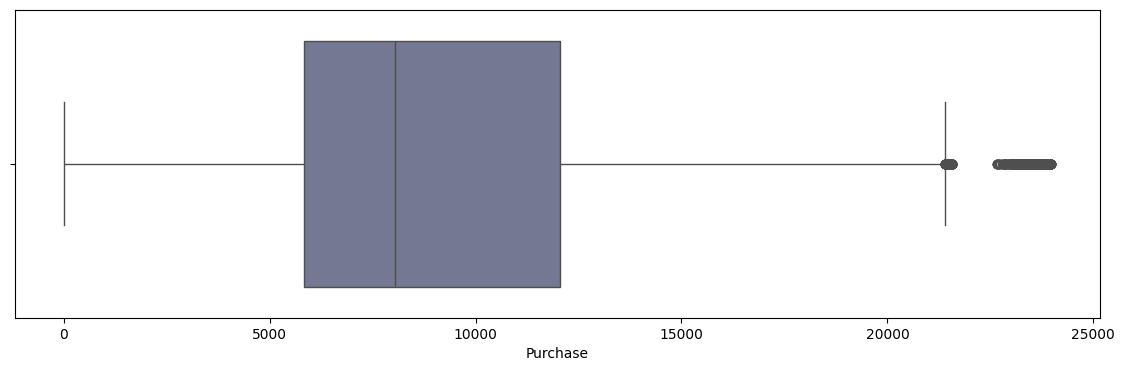

In [183]:
fig = plt.figure(figsize = (14,4))
sns.boxplot(x=df['Purchase'],color='#6F7597')
plt.show()

**<h3>Insights<h3>**
Based on this graphical representation, it is evident that 'Purchase' have a huge number of outliers

In [184]:
Q1 = np.percentile(df['Purchase'], 25)
Q3 = np.percentile(df['Purchase'], 75)
Q2 = np.percentile(df['Purchase'], 50)
IQR = Q3 - Q1

    # Define the outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
outliers = df[(df['Purchase']< lower_threshold) | (df['Purchase']> upper_threshold)]
    # Find the outliers for the variable
print("Q1: ",Q1)
print("Q3: ",Q3)
print("Median: ",Q2)
print("Inner Quartile Range for purchases:", IQR )
print("Purchase Outlier count :", len(outliers))

Q1:  5823.0
Q3:  12054.0
Median:  8047.0
Inner Quartile Range for purchases: 6231.0
Purchase Outlier count : 2677


In [185]:
clipped_purchase=np.clip(df['Purchase'], np.percentile(df['Purchase'], 5), np.percentile(df['Purchase'],95))

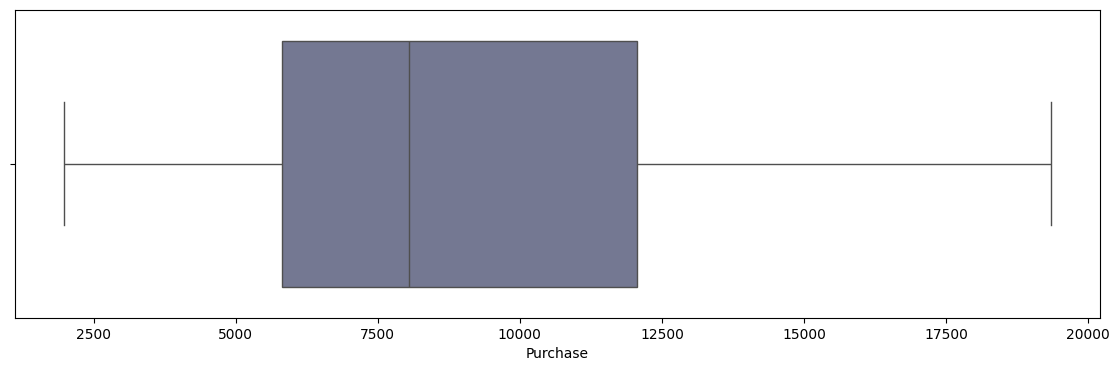

In [186]:
fig = plt.figure(figsize = (14,4))
sns.boxplot(x=clipped_purchase,color='#6F7597')
plt.show()

**<u><h2>Univariate Analysis & Multivariate Analysis<h2><u>**

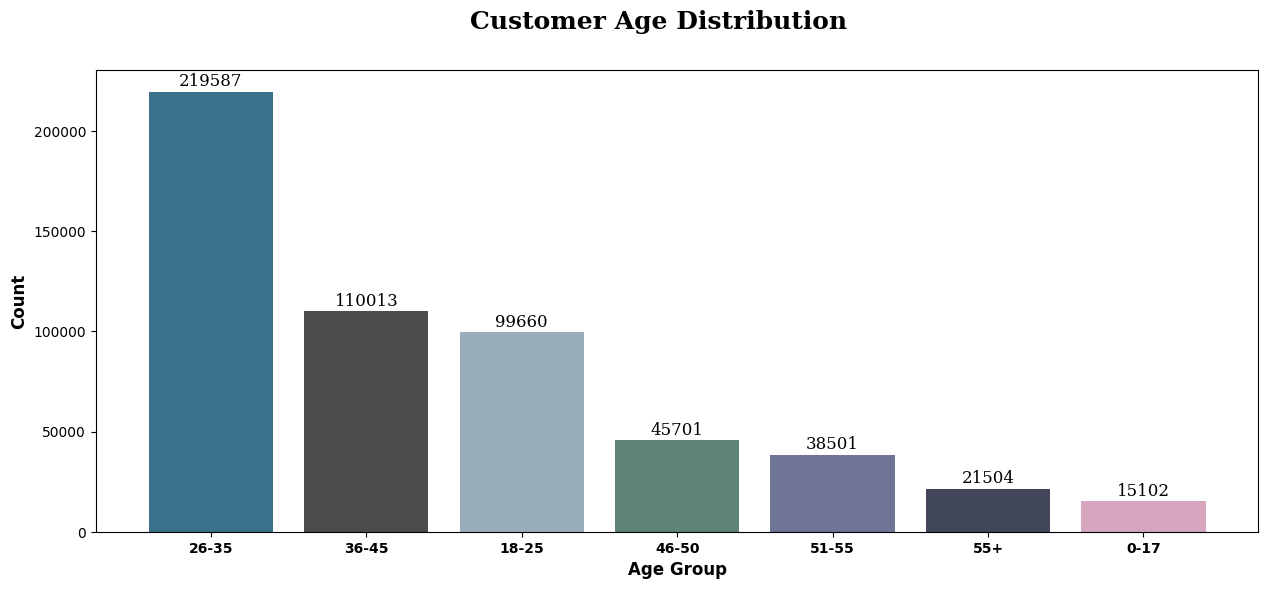

In [187]:
#setting the plot style
fig = plt.figure(figsize = (15,6))
gs = fig.add_gridspec(1)
# creating bar chart for age disribution
ax0 = fig.add_subplot(gs[0])
temp = df['Age'].value_counts()
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#42465a','#d5a6bd']
plt.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2)
#adding the value_counts
for i in temp.index:
    ax0.text(i,temp[i]+5000,temp[i],{'font':'serif','size' : 12},ha = 'center',va = 'center')
#adding axis label
ax0.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax0.set_xlabel('Age Group',fontweight = 'bold',fontsize = 12)
ax0.set_xticklabels(temp.index,fontweight = 'bold')
fig.suptitle('Customer Age Distribution',font = 'serif', size = 18, weight = 'bold')

plt.show()

In [188]:
df['Marital_Status'] = df['Marital_Status'].replace({0:'Unmarried',1:'Married'})


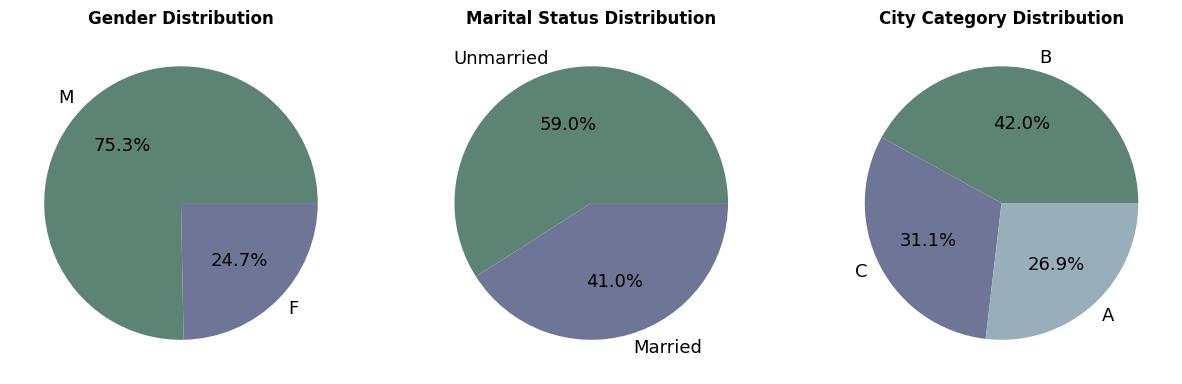

In [189]:
fig = plt.figure(figsize = (15,12))
gs = fig.add_gridspec(1,3)

ax0 = fig.add_subplot(gs[0,0])

color_map = ['#5C8374','#6F7597']
ax0.pie(df['Gender'].value_counts().values,labels = df['Gender'].value_counts().index,autopct = '%.1f%%',colors = color_map,textprops={'fontsize': 13, 'color': 'black'})
#setting title for visual
ax0.set_title('Gender Distribution',fontweight = 'bold')

 # creating pie chart for marital status
ax1 = fig.add_subplot(gs[0,1])

color_map = ['#5C8374','#6F7597']
ax1.pie(df['Marital_Status'].value_counts().values,labels = df['Marital_Status'].value_counts().index,autopct = '%.1f%%',colors = color_map,textprops={'fontsize': 13, 'color': 'black'})
#setting title for visual
ax1.set_title('Marital Status Distribution',fontweight = 'bold')

# creating pie chart for city category
ax2 = fig.add_subplot(gs[0,2])

color_map = ['#5C8374','#6F7597','#99AEBB']
ax2.pie(df['City_Category'].value_counts().values,labels = df['City_Category'].value_counts().index,autopct = '%.1f%%',colors = color_map,textprops={'fontsize': 13, 'color': 'black'})
#setting title for visual
ax2.set_title('City Category Distribution',fontweight = 'bold')

plt.show()

**<h3>Insights<h3>**


*   Data indicates a high difference in purchase behavior between males and females during the Black Friday event.

*   Given that unmarried customers account for a higher percentage of transactions, it may be worthwhile to consider specific marketing campaigns or promotions that appeal to this group.
*  City B saw the most number of transactions followed by City C and City A respectively




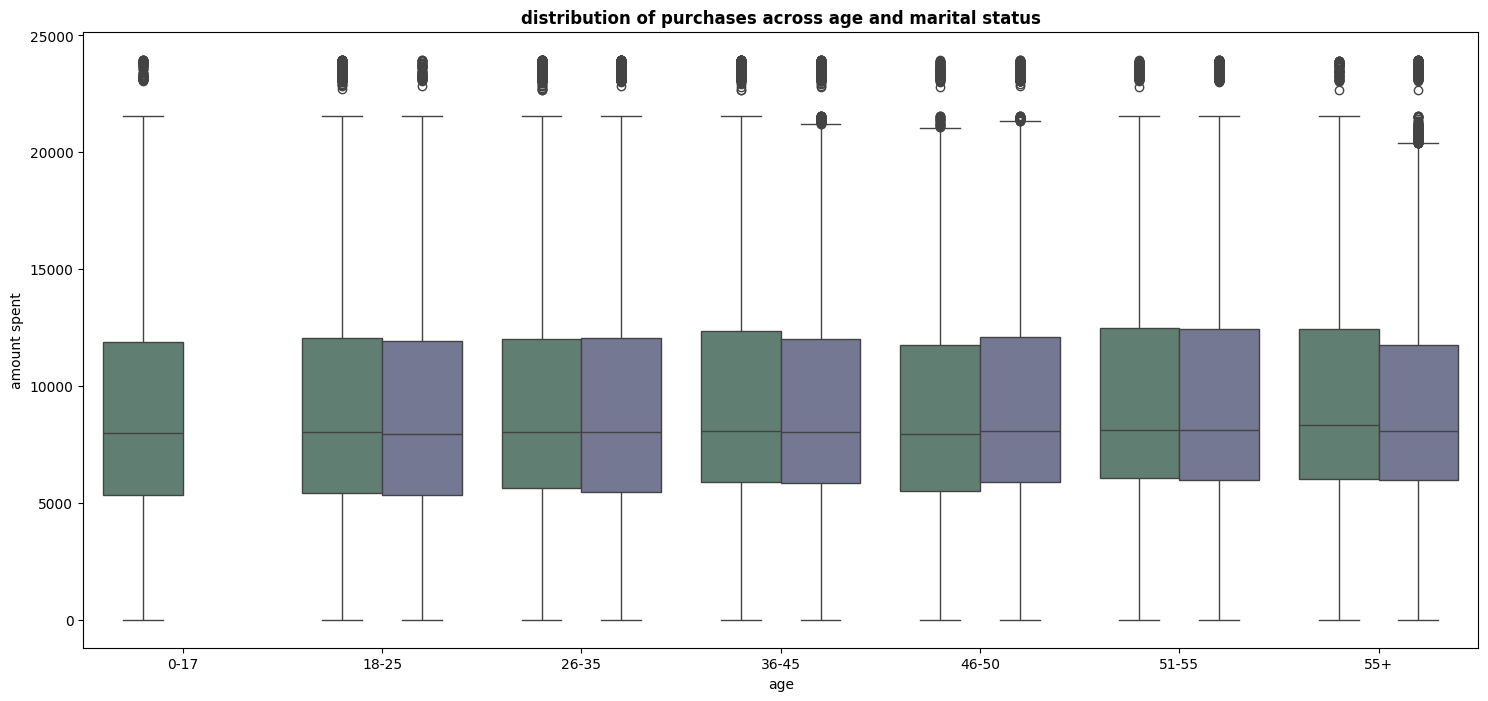

In [190]:
# Create a box plot of the data
fig = plt.figure(figsize = (18,8))
color_map = ['#5C8374','#6F7597']
orders=['0-17','18-25','26-35','36-45','46-50','51-55','55+']
sns.boxplot(data=df,x="Age",y="Purchase", hue="Marital_Status",palette =color_map, legend=False,order=orders)
plt.title('distribution of purchases across age and marital status',fontweight = 'bold')
plt.xlabel('age')
plt.ylabel('amount spent')
# Show the plot
plt.show()

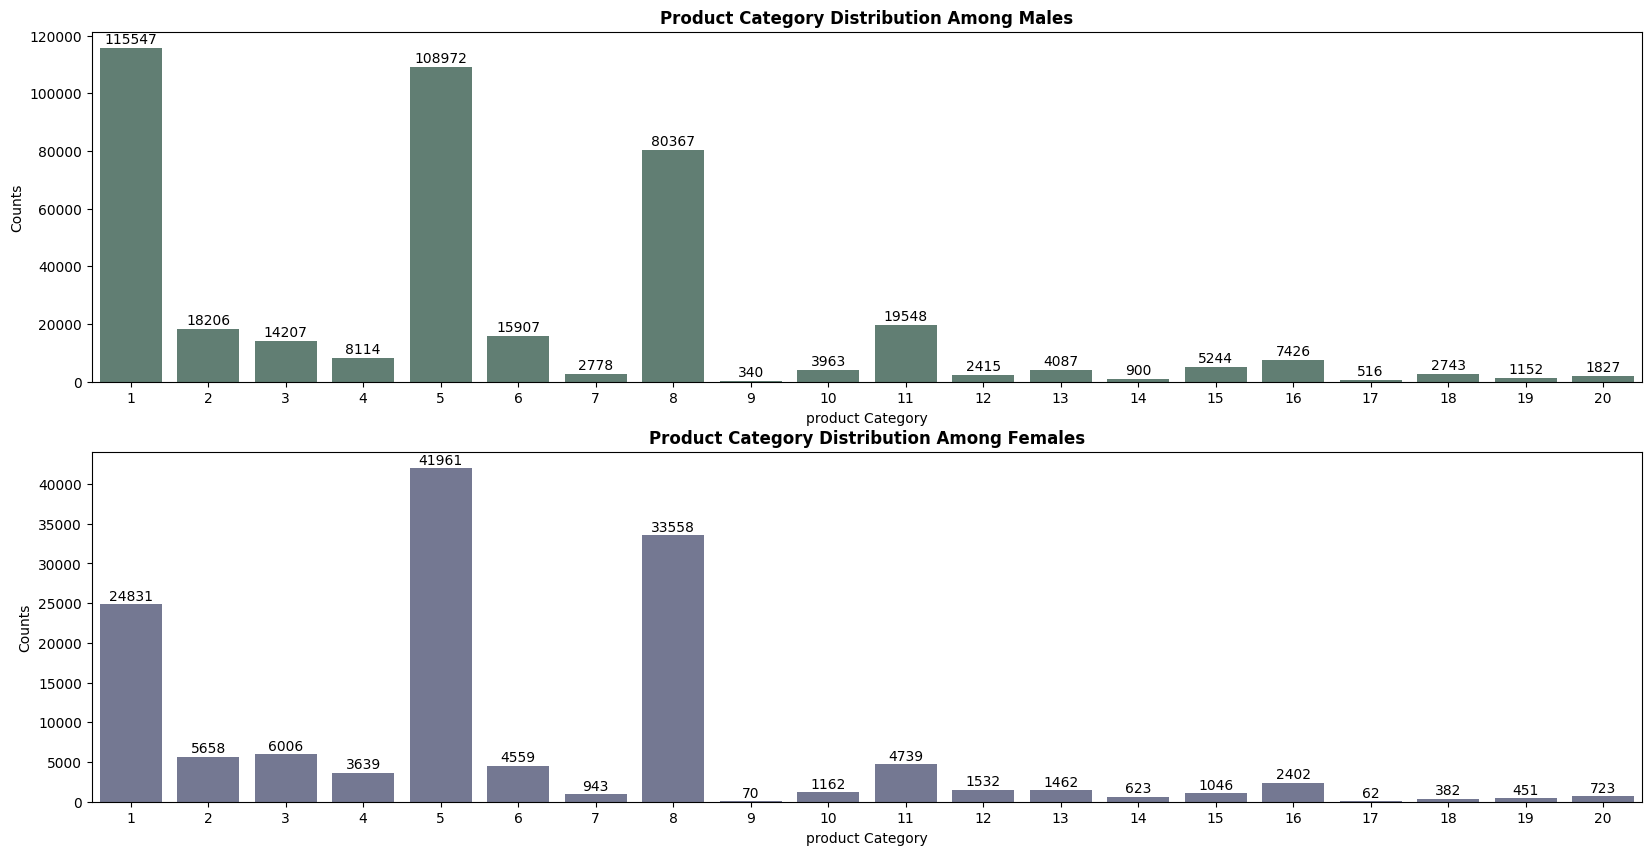

In [191]:
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(2,1)
ax0 = fig.add_subplot(gs[0,:])
male_df= df[df['Gender']=='M']
temp1 = male_df['Product_Category'].value_counts()
sns.countplot(x='Product_Category',data=male_df,ax = ax0, color='#5C8374')
for i in temp1.index:
    ax0.text(i-1, temp1[i]+3000,temp1[i],ha = 'center',va = 'center')
ax0.set_title('Product Category Distribution Among Males',fontweight = 'bold')
plt.xlabel('product Category')
plt.ylabel('Counts')

ax1 = fig.add_subplot(gs[1,:])
female_df= df[df['Gender']=='F']
temp2 = female_df['Product_Category'].value_counts()
sns.countplot(x='Product_Category',data=female_df,ax = ax1,color='#6F7597')
for i in temp2.index:
    ax1.text(i-1, temp2[i]+1000,temp2[i],ha = 'center',va = 'center')
ax1.set_title('Product Category Distribution Among Females',fontweight = 'bold')
plt.xlabel('product Category')
plt.ylabel('Counts')

plt.show()

**<h3>Insights<h3>**
Categories 1,5 and 8 is most popular product categories for both males and females combined Sales of nearly 75% of the total sales suggesting a strong preference for these products among customers.


**<u><h2>Confidence Interval Construction<h2><u>**

In [192]:
def confidence_interval(data,ci):
    #Converting the list to series
    lower_ci = (100-ci)/2
    upper_ci = (100+ci)/2

    #Calculating lower limit and upper limit of confidence interval
    interval = np.percentile(data,[lower_ci,upper_ci]).round(0)

    return interval

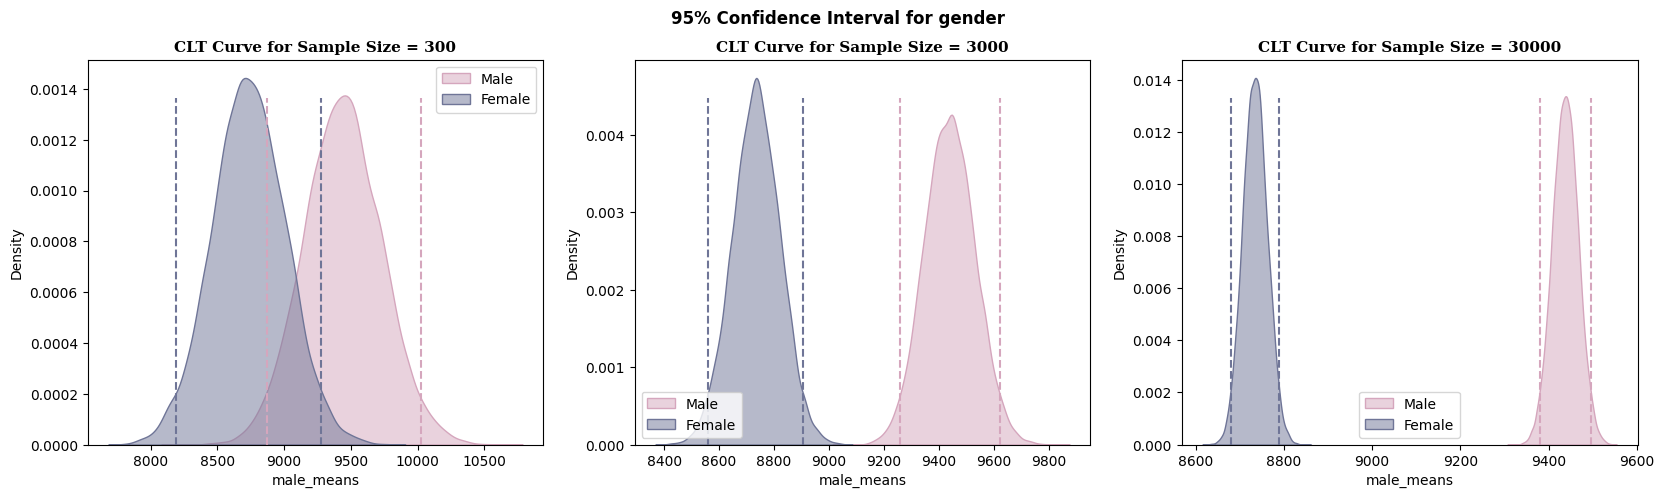

In [193]:
def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (20,5))
    gs = fig.add_gridspec(1,3)

    #creating separate data frames for each gender
    walmart_data_male = df.loc[df['Gender'] == 'M','Purchase']
    walmart_data_female = df.loc[df['Gender'] == 'F','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(300,0),(3000,1),(30000,2)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    male_samples = {}
    female_samples = {}

    # In each iteration of the loop, "i", "x", "y" will hold the "sample size", "row position", "column position" respectively for plotting purposes
    # This allows iterate over different sample sizes and correspondingly place the resulting plots in different positions within a grid of subplots
    for i,y in sample_sizes:
        male_means = [] #list for collecting the means of male sample
        female_means = [] #list for collecting the means of female sample

        for j in range(bootstrap_samples):
            #creating random 5000 samples of i (sample size)
            male_bootstrapped_samples = np.random.choice(walmart_data_male,size = i)
            female_bootstrapped_samples = np.random.choice(walmart_data_female,size = i)

            #calculating mean of those samples
            male_sample_mean = np.mean(male_bootstrapped_samples)
            female_sample_mean = np.mean(female_bootstrapped_samples)

            #appending the mean to the list
            male_means.append(male_sample_mean)
            female_means.append(female_sample_mean)

        #storing the above sample generated
        male_samples[f'{ci}%_{i}'] = male_means
        female_samples[f'{ci}%_{i}'] = female_means

        #creating a temporary dataframe for creating kdeplot
        temp_walmart_data = pd.DataFrame(data = {'male_means':male_means,'female_means':female_means})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[0,y])

        #plots for male and female
        sns.kdeplot(data = temp_walmart_data,x = 'male_means',color ="#d5a6bd" ,fill = True, alpha = 0.5,ax = ax,label = 'Male')
        sns.kdeplot(data = temp_walmart_data,x = 'female_means',color ="#6F7597" ,fill = True, alpha = 0.5,ax = ax,label = 'Female')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(male_means,ci)
        f_range = confidence_interval(female_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#d5a6bd",linestyle = '--')

        for k in f_range:
            ax.axvline(x = k,ymax = 0.9, color ="#6F7597",linestyle = '--')


        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval for gender', weight = 'bold')

    plt.show()

    return male_samples,female_samples
m_samp_95,f_samp_95 = plot(95)

**<h3>Insights<h3>**


*   It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.
* The confidence interval do not overlap as the sample size increases. This means that there is a statistically significant difference between the average spending per transaction for men and women within the given samples.




In [194]:
 #finding ci for each sample size (males)
print("Male")
for m in m_samp_95 :
    m_range = confidence_interval(m_samp_95[m],k)
    print(f"{m}-->CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

    #finding ci for each sample size (females)
print("Female")
for f in f_samp_95:
   f_range = confidence_interval(f_samp_95[f],k)
   print(f"{f}-->CI = ${f_range[0]:.0f} - ${f_range[1]:.0f}, Range = {(f_range[1] - f_range[0]):.0f}")


Male
95%_300-->CI = $8873 - $10023, Range = 1150
95%_3000-->CI = $9258 - $9622, Range = 364
95%_30000-->CI = $9380 - $9495, Range = 115
Female
95%_300-->CI = $8188 - $9278, Range = 1090
95%_3000-->CI = $8561 - $8906, Range = 345
95%_30000-->CI = $8681 - $8789, Range = 108


**<h3>Insights<h3>**
We are 95% confident that the true population average for males falls between  9,203 and 9,318' and for females, it falls between 8681 and  8789.



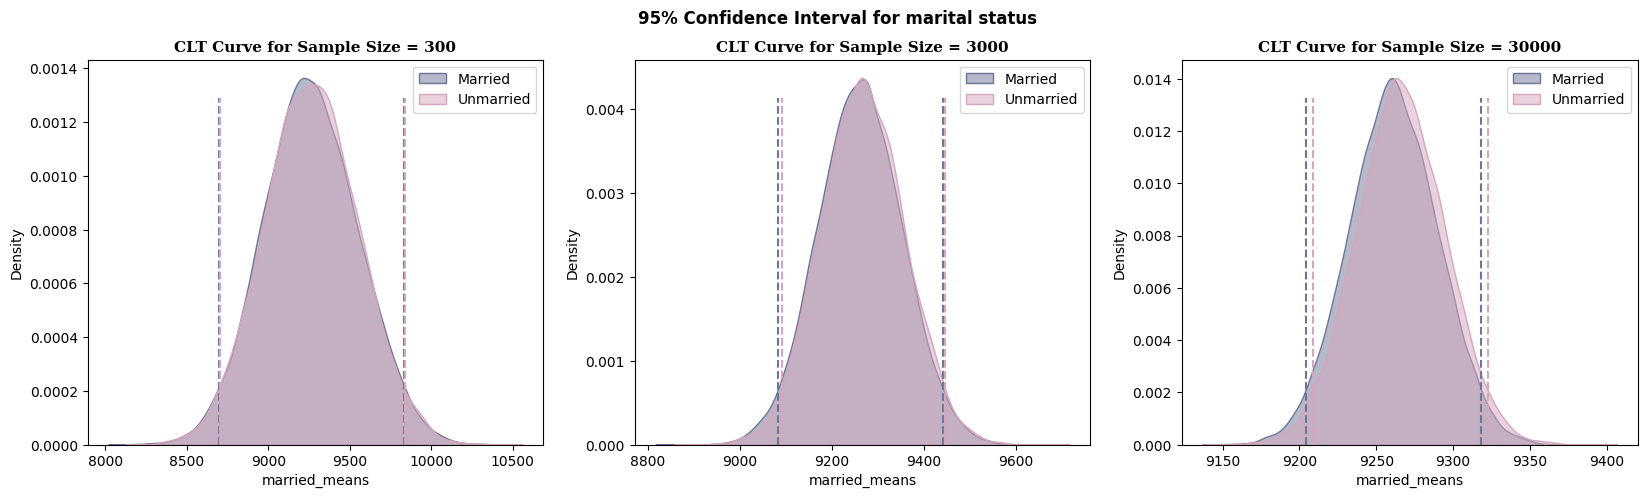

In [195]:
def plot(ci):
    #setting the plot style
    fig = plt.figure(figsize = (20,5))
    gs = fig.add_gridspec(1,3)

    #creating separate data frames
    df_married = df.loc[df['Marital_Status'] == 'Married','Purchase']
    df_unmarried = df.loc[df['Marital_Status'] == 'Unmarried','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(300,0),(3000,1),(30000,2)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    married_samples = {}
    unmarried_samples = {}

    for i,y in sample_sizes:
        married_means = [] #list for collecting the means of married sample
        unmarried_means = [] #list for collecting the means of unmarried sample

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            married_bootstrapped_samples = np.random.choice(df_married,size = i)
            unmarried_bootstrapped_samples = np.random.choice(df_unmarried,size = i)

            #calculating mean of those samples
            married_sample_mean = np.mean(married_bootstrapped_samples)
            unmarried_sample_mean = np.mean(unmarried_bootstrapped_samples)

            #appending the mean to the list
            married_means.append(married_sample_mean)
            unmarried_means.append(unmarried_sample_mean)

        #storing the above sample generated
        married_samples[f'{ci}%_{i}'] = married_means
        unmarried_samples[f'{ci}%_{i}'] = unmarried_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'married_means':married_means,'unmarried_means':unmarried_means})

        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[0,y])

        #plots for married and unmarried
        sns.kdeplot(data = temp_df,x = 'married_means',color ="#6F7597" ,fill = True, alpha = 0.5,ax = ax,label = 'Married')
        sns.kdeplot(data = temp_df,x = 'unmarried_means',color ="#d5a6bd" ,fill = True, alpha = 0.5,ax = ax,label = 'Unmarried')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(married_means,ci)
        u_range = confidence_interval(unmarried_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#6F7597",linestyle = '--')

        for k in u_range:
            ax.axvline(x = k,ymax = 0.9, color ="#d5a6bd",linestyle = '--')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval for marital status', weight = 'bold')

    plt.show()

    return married_samples,unmarried_samples
m_samp_95,u_samp_95 = plot(95)

**<h3>Insights<h3>**

* It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.
* From the above analysis, we can see that the confidence interval overlap for all the sample sizes. This means that there is no statistically significant difference between the average spending per transaction for married and unmarried customers within the given samples.


In [196]:

#finding ci for each sample size (married)
print('Married')
for m in m_samp_95:
    m_range = confidence_interval(m_samp_95[m],95)
    print(f"{m}-->CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

#finding ci for each sample size (unmarried)
print('Unmarried')
for u in u_samp_95:
    u_range = confidence_interval(u_samp_95[u],95)
    print(f"{u}-->CI = ${u_range[0]:.0f} - ${u_range[1]:.0f}, Range = {(u_range[1] - u_range[0]):.0f}")

Married
95%_300-->CI = $8699 - $9833, Range = 1134
95%_3000-->CI = $9082 - $9441, Range = 359
95%_30000-->CI = $9204 - $9318, Range = 114
Unmarried
95%_300-->CI = $8702 - $9836, Range = 1134
95%_3000-->CI = $9091 - $9445, Range = 354
95%_30000-->CI = $9209 - $9323, Range = 114


**<h3>Insights<h3>**


*   We are 95% confident that the true population average for married customers
   falls between 9203 - 9318, and for unmarried customers, it falls between 9209 - 9322.
*   The overlapping confidence intervals of average spending for married and
   unmarried customers indicate that both married and unmarried customers spend a similar amount per transaction




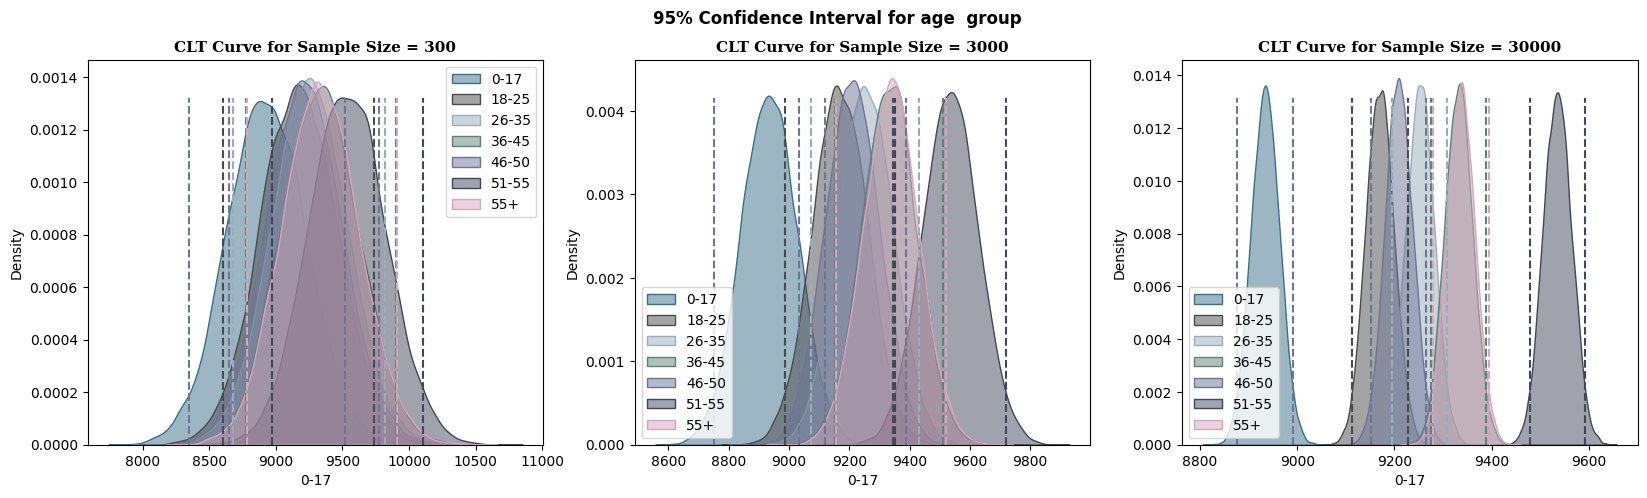

In [197]:
def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (20,5))
    gs = fig.add_gridspec(1,3)

    #creating separate data frames
    df_1 = df.loc[df['Age'] == '0-17','Purchase']
    df_2 = df.loc[df['Age'] ==  '18-25','Purchase']
    df_3 = df.loc[df['Age'] ==  '26-35','Purchase']
    df_4 = df.loc[df['Age'] ==  '36-45','Purchase']
    df_5 = df.loc[df['Age'] ==  '46-50','Purchase']
    df_6 = df.loc[df['Age'] ==  '51-55','Purchase']
    df_7 = df.loc[df['Age'] ==  '55+','Purchase']


    #sample sizes and corresponding plot positions
    sample_sizes = [(300,0),(3000,1),(30000,2)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    samples1,samples2,samples3,samples4,samples5,samples6,samples7 = {},{},{},{},{},{},{}

    for i, y in sample_sizes:
        l1,l2,l3,l4,l5,l6,l7 = [],[],[],[],[],[],[]

        for j in range(bootstrap_samples):
            #creating random 5000 samples of i sample size
            bootstrapped_samples_1 = np.random.choice(df_1,size = i)
            bootstrapped_samples_2 = np.random.choice(df_2,size = i)
            bootstrapped_samples_3 = np.random.choice(df_3,size = i)
            bootstrapped_samples_4 = np.random.choice(df_4,size = i)
            bootstrapped_samples_5 = np.random.choice(df_5,size = i)
            bootstrapped_samples_6 = np.random.choice(df_6,size = i)
            bootstrapped_samples_7 = np.random.choice(df_7,size = i)

            #calculating mean of those samples
            sample_mean_1 = np.mean(bootstrapped_samples_1)
            sample_mean_2 = np.mean(bootstrapped_samples_2)
            sample_mean_3 = np.mean(bootstrapped_samples_3)
            sample_mean_4 = np.mean(bootstrapped_samples_4)
            sample_mean_5 = np.mean(bootstrapped_samples_5)
            sample_mean_6 = np.mean(bootstrapped_samples_6)
            sample_mean_7 = np.mean(bootstrapped_samples_7)

            #appending the mean to the list
            l1.append(sample_mean_1)
            l2.append(sample_mean_2)
            l3.append(sample_mean_3)
            l4.append(sample_mean_4)
            l5.append(sample_mean_5)
            l6.append(sample_mean_6)
            l7.append(sample_mean_7)

        #storing the above sample generated
        samples1[f'{ci}%_{i}'] = l1
        samples2[f'{ci}%_{i}'] = l2
        samples3[f'{ci}%_{i}'] = l3
        samples4[f'{ci}%_{i}'] = l4
        samples5[f'{ci}%_{i}'] = l5
        samples6[f'{ci}%_{i}'] = l6
        samples7[f'{ci}%_{i}'] = l7


        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'0-17':l1,'18-25':l2,'26-35':l3,'36-45':l4,'46-50':l5,'51-55':l6,'55+':l7})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[0,y])

        #plots
        for p,q in [('#3A7089', '0-17'),('#4b4b4c', '18-25'),('#99AEBB', '26-35'),('#5C8374', '36-45'),('#6F7597', '46-50'),
                 ('#42465a', '51-55'),('#d5a6bd', '55+')]:

            sns.kdeplot(data = temp_df,x = q,color =p ,fill = True, alpha = 0.5,ax = ax,label = q)

        #calculating confidence intervals for given confidence level(ci)
        range_1 = confidence_interval(l1,ci)
        range_2 = confidence_interval(l2,ci)
        range_3 = confidence_interval(l3,ci)
        range_4 = confidence_interval(l4,ci)
        range_5 = confidence_interval(l5,ci)
        range_6 = confidence_interval(l6,ci)
        range_7 = confidence_interval(l7,ci)

        #plotting confidence interval on the distribution
        for k in range_1:
            ax.axvline(x = k,ymax = 0.9, color ="#6F7597",linestyle = '--')
        for k in range_2:
            ax.axvline(x = k,ymax = 0.9, color ="#4b4b4c",linestyle = '--')
        for k in range_3:
            ax.axvline(x = k,ymax = 0.9, color ="#99AEBB",linestyle = '--')
        for k in range_4:
            ax.axvline(x = k,ymax = 0.9, color ="#5C8374",linestyle = '--')
        for k in range_5:
            ax.axvline(x = k,ymax = 0.9, color ="#6F7597",linestyle = '--')
        for k in range_6:
            ax.axvline(x = k,ymax = 0.9, color ="#42465a",linestyle = '--')
        for k in range_7:
            ax.axvline(x = k,ymax = 0.9, color ="#d5a6bd",linestyle = '--')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval for age  group', weight = 'bold')

    plt.show()

    return samples1,samples2,samples3,samples4,samples5,samples6,samples7
samples1,samples2,samples3,samples4,samples5,samples6,samples7 = plot(95)

**<h3>Insights<h3>**


*   The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise
*  From the above analysis, we can see that 18 - 25, 26 - 35, 46 - 50 - Customers in these age groups have overlapping confidence intervals


*  0 - 17 - Customers in this age group have the lowest spending per transaction
*  51 - 55 - Customers in this age group have the highest spending per transaction





In [198]:
ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7 = ['0-17'],['18-25'],['26-35'],['36-45'],['46-50'],['51-55'],['55+']

#finding ci for each sample size
#samples = [samples1,samples2,samples3,samples4,samples5,samples6,samples7]

samples = [(samples1,ci_1),(samples2,ci_2),(samples3,ci_3),(samples4,ci_4),(samples5,ci_5),(samples6,ci_6),(samples7,ci_7)]

for s,c in samples:
    print(c)
    for i in s:
        s_range = confidence_interval(s[i],95)
        print(f"{i}-->CI = ${s_range[0]:.0f} - ${s_range[1]:.0f}, Range = {(s_range[1] - s_range[0]):.0f}")

['0-17']
95%_300-->CI = $8346 - $9516, Range = 1170
95%_3000-->CI = $8752 - $9119, Range = 367
95%_30000-->CI = $8876 - $8992, Range = 116
['18-25']
95%_300-->CI = $8604 - $9736, Range = 1132
95%_3000-->CI = $8988 - $9345, Range = 357
95%_30000-->CI = $9113 - $9227, Range = 114
['26-35']
95%_300-->CI = $8682 - $9821, Range = 1139
95%_3000-->CI = $9074 - $9431, Range = 357
95%_30000-->CI = $9195 - $9309, Range = 114
['36-45']
95%_300-->CI = $8775 - $9901, Range = 1126
95%_3000-->CI = $9152 - $9511, Range = 359
95%_30000-->CI = $9275 - $9388, Range = 113
['46-50']
95%_300-->CI = $8652 - $9776, Range = 1124
95%_3000-->CI = $9034 - $9388, Range = 354
95%_30000-->CI = $9152 - $9265, Range = 113
['51-55']
95%_300-->CI = $8970 - $10108, Range = 1138
95%_3000-->CI = $9353 - $9718, Range = 365
95%_30000-->CI = $9478 - $9592, Range = 114
['55+']
95%_300-->CI = $8780 - $9907, Range = 1127
95%_3000-->CI = $9157 - $9519, Range = 362
95%_30000-->CI = $9280 - $9394, Range = 114


<h3>Insight<h3>


*  We are 95% confident that the true population average for following age groups falls between the below range -

0 - 17 = usd 8,888 to 8,979

18 - 25 = usd  9,125 to 9,213

26 - 35 = usd  9,209 to 9,297

36 - 45 = usd  9,288 to 9,376

46 - 50 = usd  9,165 to 9,253

51 - 55 = usd  9,490 to 9,579

55+ = usd  9,292 to 9,381




**<u><h2>Recommendations<h2><u>**



*  To increase sales, the company should implement strategies tailored to both genders, considering that men generally spend more. While targeting male customers, it's essential not to overlook females by offering discounts and special offers.

* since the age group of 51-55 demonstrates higher spending, allocating more resources to attract customers from other age brackets is crucial.

*  Certain product categories, such as 19, 20, and 13, show minimal purchase activity. Considering dropping these categories could streamline inventory and resource allocation, optimizing overall operations

* Moreover, the analysis reveals a significant frequency of purchase orders falling within the 5k to 10k range. Focusing efforts on promoting and enhancing the appeal of products within this mid-range price segment can potentially drive higher sales and revenue.


*  Walmart can focus on broader marketing strategies that appeal to Unmarried people along with Married People.
*  Based on the  data of average spending per transaction by gender, they might adjust pricing or discount strategies to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.


